<a href="https://colab.research.google.com/github/Muhammad-Farhan-A/Kelompok-2-APM-B/blob/main/Prak2_DecisionTree_ID3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#mengimport library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [3]:
#memanggil dataset serta menampilkannya
data = pd.read_csv('Iris.csv')
data = data.drop(labels='Id', axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#mengubah tipe data string menjadi numerik
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data['Species'] = enc.fit_transform(data['Species'].values)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
#menentukan label dan memisahkannya
feature = data.drop(columns = 'Species')
feature.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
#menampilkan data label
label = data['Species']
label.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [7]:
#membagi dataset menjadi training set dan testing set serta menerapkan algoritma decision tree
xtrain, xtest, ytrain, ytest = train_test_split(feature, label, test_size=0.2, random_state=1)
tree_data = DecisionTreeClassifier(criterion="entropy", max_depth=3)
tree_data = tree_data.fit(xtrain, ytrain)
y_pred = tree_data.predict(xtest)
print("Nilai akurasi : ", metrics.accuracy_score(ytest, y_pred))

Nilai akurasi :  0.9666666666666667


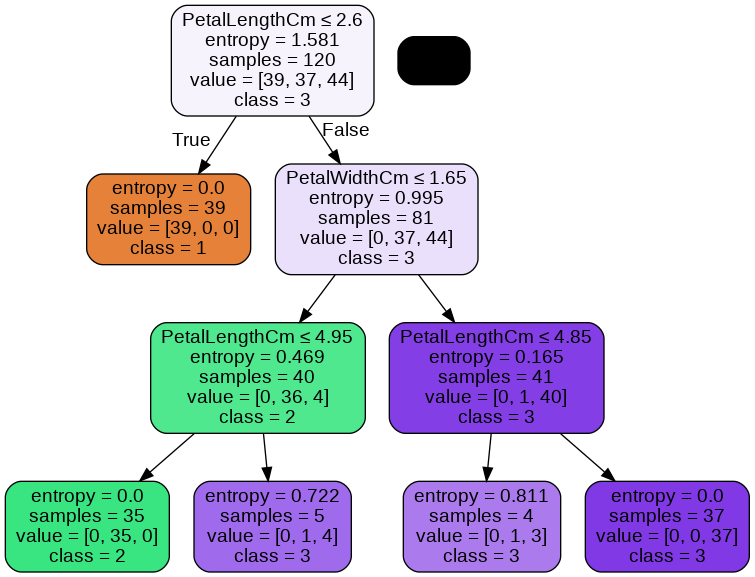

In [8]:
#menampilkan grafis decision tree
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
data_graph = export_graphviz(tree_data, out_file=None, filled=True, rounded=True, special_characters=True,
                feature_names=feature.columns, class_names=["1","2","3"])
graph = pydotplus.graph_from_dot_data(data_graph)
graph.write_png('DecisionTreeID3.png')
Image(graph.create_png())